In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
mostrecentdate = session.query(func.max(measurement.date)).first()
mostrecentdate

('2017-08-23',)

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(measurement.date, measurement.prcp).filter((measurement.date >= '2016-08-24') & (measurement.date <= '2017-08-23')).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precipitation).set_index('date')

#renaming precipitation column
precipitation_df = precipitation_df.rename(columns={'prcp':'precipitation'})

# Sort the dataframe by date, also dropping the dates that do not have a date in the data.
precipitation_df = precipitation_df.sort_values(by='date').dropna()

# Use Pandas Plotting with Matplotlib to plot the data

In [11]:
print(precipitation_df.head())

            precipitation
date                     
2016-08-24           0.08
2016-08-24           2.15
2016-08-24           2.28
2016-08-24           2.15
2016-08-24           1.45


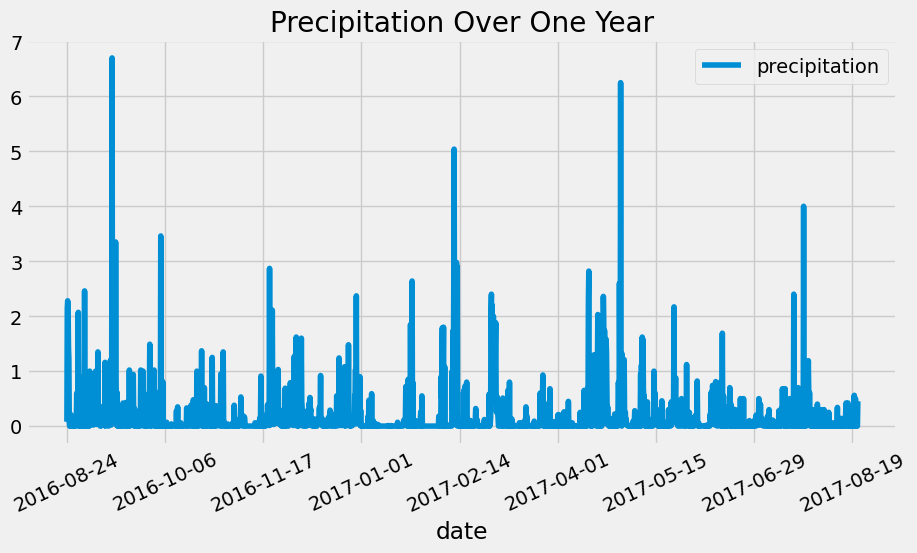

In [12]:
precipitation_df.plot(y='precipitation', figsize=(10, 5), title='Precipitation Over One Year', rot=25)
plt.show()

In [13]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = precipitation_df.describe()
summary_stats

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number of stations in the dataset
stations_available = session.query(station.id).count()
#print how many stations are available
print(f'{stations_available} stations available.')

9 stations available.


In [15]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
stations_most_active = (session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.id).desc()).all())
stations_most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_number = 'USC00519281'
#I had a hard time getting the data to show up for the station number that I wanted but did some research and realized I needed to compare.
session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station == station_number).all()

[(54.0, 85.0, 71.66378066378067)]

<Axes: title={'center': 'Station USC00519281'}, ylabel='Frequency'>

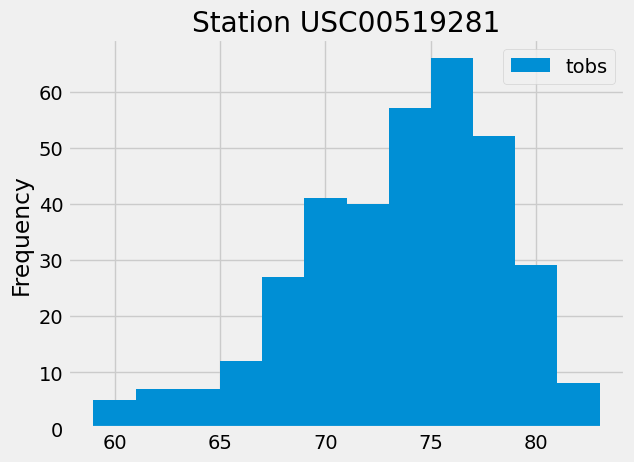

In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last12 = stations_most_active[0][0]

data = session.query(measurement.date, measurement.tobs).filter(measurement.date >= "2016-08-24").filter(measurement.date <= "2017-08-23").filter(measurement.station == last12).all()

# convert to dataframe
data_df = pd.DataFrame(data)

# historgram 
data_df.plot.hist(bins=12, title='Station USC00519281')

# Close Session

In [18]:
# Close Session
session.close()